In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("D:\\IIM Raipur\\Task_1\\1st_column.csv")

In [3]:
df.head()

,Date,S&P GREEN BOND PRICE INDEX
0,19-07-2010,107.1385
1,20-07-2010,107.4549
2,21-07-2010,108.0126
3,22-07-2010,108.8646
4,23-07-2010,108.4933


In [4]:
df.tail()

,Date,S&P GREEN BOND PRICE INDEX
3379,30-06-2023,84.21033
3380,03-07-2023,84.09508
3381,04-07-2023,84.06270
3382,05-07-2023,83.81323
3383,06-07-2023,83.14432


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\amita\AppData\Local\Temp\ipykernel_29288\2394721818.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.set_index('Date', inplace = True)

In [7]:
df.head()

,S&P GREEN BOND PRICE INDEX
Date,
2010-07-19,107.1385
2010-07-20,107.4549
2010-07-21,108.0126
2010-07-22,108.8646
2010-07-23,108.4933


<Axes: title={'center': 'S&P GREEN BOND PRICE INDEX'}, xlabel='Date'>

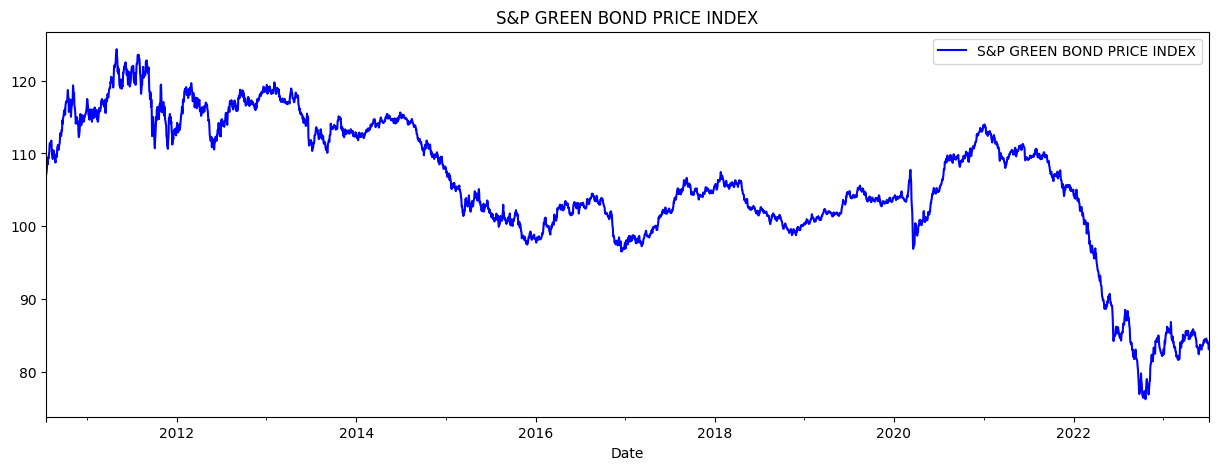

In [8]:
df.plot(figsize = (15,5),color='b', title= df.columns[0])

In [9]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out =1,dropnan=True):
    cols = []
    # Create lagged input sequence columns
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i).add_prefix(f'lag {i}'))  # Change column names  #The shift() function is actually specific to pandas Series and DataFrame objects, not limited to DataFrame only.
    
    for i in range(0,n_out):
        cols.append(data.shift(-i))

    # Concatenate the columns into a single DataFrame
    df_new = pd.concat(cols, axis=1)

    # Drop rows with NaN values if dropnan is True
    if dropnan:
        df_new.dropna(inplace=True)

    return df_new

In [10]:
df_new = series_to_supervised(df, n_in=5,n_out =1)                #df_new is pandas dataframe

In [11]:
df_new

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX
Date,,,,,,
2010-07-26,107.13850,107.45490,108.01260,108.86460,108.49330,109.18570
2010-07-27,107.45490,108.01260,108.86460,108.49330,109.18570,109.47720
2010-07-28,108.01260,108.86460,108.49330,109.18570,109.47720,109.32030
2010-07-29,108.86460,108.49330,109.18570,109.47720,109.32030,109.92750
2010-07-30,108.49330,109.18570,109.47720,109.32030,109.92750,110.21480
...,...,...,...,...,...,...
2023-06-30,84.30928,84.58115,84.58900,84.39140,84.01318,84.21033
2023-07-03,84.58115,84.58900,84.39140,84.01318,84.21033,84.09508
2023-07-04,84.58900,84.39140,84.01318,84.21033,84.09508,84.06270


In [12]:
a = df_new['lag 4S&P GREEN BOND PRICE INDEX']

In [13]:
type(a)

pandas.core.series.Series

In [14]:
b = np.array(a)

In [15]:
b.reshape(3379,1)

array([[107.4549 ],
       [108.0126 ],
       [108.8646 ],
       ...,
       [ 84.3914 ],
       [ 84.01318],
       [ 84.21033]])

In [16]:
type(df_new)

pandas.core.frame.DataFrame

In [17]:
df_new.shape

(3379, 6)

#### Introducing moving average of 5 days,10 days and 20 days as features 

In [18]:
import pandas as pd


# Calculate the 5-day moving average
df_new['5-day Moving Average'] = df_new['S&P GREEN BOND PRICE INDEX'].rolling(window=5).mean()

# Calculate the 10-day moving average
df_new['10-day Moving Average'] = df_new['S&P GREEN BOND PRICE INDEX'].rolling(window=10).mean()

# Calculate the 20-day moving average
df_new['20-day Moving Average'] = df_new['S&P GREEN BOND PRICE INDEX'].rolling(window=20).mean()

# Drop rows with NaN values if necessary
df_new.dropna(inplace=True)

# Now 'df_new' will have the 5-day, 10-day, and 20-day moving averages as additional columns


In [19]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average
Date,,,,,,,,,
2010-08-20,109.2520,110.0036,110.4314,110.2275,110.0642,109.3158,110.00850,110.12719,110.308430
2010-08-23,110.0036,110.4314,110.2275,110.0642,109.3158,109.4335,109.89448,109.89426,110.320820
2010-08-24,110.4314,110.2275,110.0642,109.3158,109.4335,109.1140,109.63100,109.72704,110.302660
2010-08-25,110.2275,110.0642,109.3158,109.4335,109.1140,108.7473,109.33496,109.62399,110.274010
2010-08-26,110.0642,109.3158,109.4335,109.1140,108.7473,109.7482,109.27176,109.63375,110.265045


Introducing bias to the dataset

In [20]:
# Calculate the 5-day bias
df_new['5-day Bias'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['5-day Moving Average']) / df_new['5-day Moving Average']

# Calculate the 10-day bias
df_new['10-day Bias'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['10-day Moving Average']) / df_new['10-day Moving Average']

# Calculate the 20-day bias
df_new['20-day Bias'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['20-day Moving Average']) / df_new['20-day Moving Average']

In [21]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average,5-day Bias,10-day Bias,20-day Bias
Date,,,,,,,,,,,,
2010-08-20,109.2520,110.0036,110.4314,110.2275,110.0642,109.3158,110.00850,110.12719,110.308430,-0.006297,-0.007368,-0.008999
2010-08-23,110.0036,110.4314,110.2275,110.0642,109.3158,109.4335,109.89448,109.89426,110.320820,-0.004195,-0.004193,-0.008043
2010-08-24,110.4314,110.2275,110.0642,109.3158,109.4335,109.1140,109.63100,109.72704,110.302660,-0.004716,-0.005587,-0.010776
2010-08-25,110.2275,110.0642,109.3158,109.4335,109.1140,108.7473,109.33496,109.62399,110.274010,-0.005375,-0.007997,-0.013845
2010-08-26,110.0642,109.3158,109.4335,109.1140,108.7473,109.7482,109.27176,109.63375,110.265045,0.004360,0.001044,-0.004687


Introducing momentum in the dataset

In [22]:
# Calculate the 5-day momentum
df_new['5-day Momentum'] = df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(5)

# Calculate the 10-day momentum
df_new['10-day Momentum'] = df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(10)

# Calculate the 20-day momentum
df_new['20-day Momentum'] = df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(20)

# Drop rows with NaN values if necessary
df_new.dropna(inplace=True)

In [23]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average,5-day Bias,10-day Bias,20-day Bias,5-day Momentum,10-day Momentum,20-day Momentum
Date,,,,,,,,,,,,,,,
2010-09-17,111.3324,112.0932,112.7747,112.8343,112.3994,112.5589,112.53210,111.77835,110.841170,0.000238,0.006983,0.015497,1.2265,1.3930,3.2431
2010-09-20,112.0932,112.7747,112.8343,112.3994,112.5589,113.2580,112.76506,111.98704,111.032395,0.004371,0.011349,0.020045,1.1648,2.0869,3.8245
2010-09-21,112.7747,112.8343,112.3994,112.5589,113.2580,113.1355,112.83722,112.25166,111.233470,0.002643,0.007874,0.017099,0.3608,2.6462,4.0215
2010-09-22,112.8343,112.3994,112.5589,113.2580,113.1355,114.5746,113.18528,112.62048,111.524835,0.012275,0.017351,0.027346,1.7403,3.6882,5.8273
2010-09-23,112.3994,112.5589,113.2580,113.1355,114.5746,114.0759,113.52058,112.90369,111.741220,0.004892,0.010382,0.020894,1.6765,2.8321,4.3277


Introducing Rate of change (ROC) in the dataset

In [24]:
# Calculate the 5-day ROC (Rate of Change)
df_new['5-day ROC'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(5)) / df_new['S&P GREEN BOND PRICE INDEX'].shift(5)

# Calculate the 10-day ROC (Rate of Change)
df_new['10-day ROC'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(10)) / df_new['S&P GREEN BOND PRICE INDEX'].shift(10)

# Calculate the 20-day ROC (Rate of Change)
df_new['20-day ROC'] = (df_new['S&P GREEN BOND PRICE INDEX'] - df_new['S&P GREEN BOND PRICE INDEX'].shift(20)) / df_new['S&P GREEN BOND PRICE INDEX'].shift(20)

# Drop rows with NaN values if necessary
df_new.dropna(inplace=True)

In [25]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average,5-day Bias,10-day Bias,20-day Bias,5-day Momentum,10-day Momentum,20-day Momentum,5-day ROC,10-day ROC,20-day ROC
Date,,,,,,,,,,,,,,,,,,
2010-10-15,117.2015,117.2042,117.0550,118.0695,118.6996,117.8356,117.77278,117.19547,115.997515,0.000533,0.005462,0.015846,0.6341,1.8179,5.2767,0.005410,0.015669,0.046879
2010-10-18,117.2042,117.0550,118.0695,118.6996,117.8356,117.5315,117.83824,117.41692,116.211190,-0.002603,0.000976,0.011361,0.3273,2.2145,4.2735,0.002793,0.019204,0.037732
2010-10-19,117.0550,118.0695,118.6996,117.8356,117.5315,115.6998,117.56720,117.33176,116.339405,-0.015884,-0.013909,-0.005498,-1.3552,-0.8516,2.5643,-0.011577,-0.007307,0.022666
2010-10-20,118.0695,118.6996,117.8356,117.5315,115.6998,116.9975,117.35280,117.34465,116.460550,-0.003028,-0.002958,0.004611,-1.0720,0.1289,2.4229,-0.009079,0.001103,0.021147
2010-10-21,118.6996,117.8356,117.5315,115.6998,116.9975,117.1751,117.04790,117.34693,116.615510,0.001087,-0.001464,0.004799,-1.5245,0.0228,3.0992,-0.012843,0.000195,0.027168


Introducing exponential moving average as features 

In [26]:
# Calculate the 5-day exponential moving average (EMA)
df_new['5-day EMA'] = df_new['S&P GREEN BOND PRICE INDEX'].ewm(span=5, adjust=False).mean()

# Calculate the 10-day exponential moving average (EMA)
df_new['10-day EMA'] = df_new['S&P GREEN BOND PRICE INDEX'].ewm(span=10, adjust=False).mean()

# Calculate the 20-day exponential moving average (EMA)
df_new['20-day EMA'] = df_new['S&P GREEN BOND PRICE INDEX'].ewm(span=20, adjust=False).mean()

# Drop rows with NaN values if necessary
df_new.dropna(inplace=True)

In [27]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average,5-day Bias,...,20-day Bias,5-day Momentum,10-day Momentum,20-day Momentum,5-day ROC,10-day ROC,20-day ROC,5-day EMA,10-day EMA,20-day EMA
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-15,117.2015,117.2042,117.0550,118.0695,118.6996,117.8356,117.77278,117.19547,115.997515,0.000533,...,0.015846,0.6341,1.8179,5.2767,0.005410,0.015669,0.046879,117.835600,117.835600,117.835600
2010-10-18,117.2042,117.0550,118.0695,118.6996,117.8356,117.5315,117.83824,117.41692,116.211190,-0.002603,...,0.011361,0.3273,2.2145,4.2735,0.002793,0.019204,0.037732,117.734233,117.780309,117.806638
2010-10-19,117.0550,118.0695,118.6996,117.8356,117.5315,115.6998,117.56720,117.33176,116.339405,-0.015884,...,-0.005498,-1.3552,-0.8516,2.5643,-0.011577,-0.007307,0.022666,117.056089,117.402035,117.605987
2010-10-20,118.0695,118.6996,117.8356,117.5315,115.6998,116.9975,117.35280,117.34465,116.460550,-0.003028,...,0.004611,-1.0720,0.1289,2.4229,-0.009079,0.001103,0.021147,117.036559,117.328483,117.548036
2010-10-21,118.6996,117.8356,117.5315,115.6998,116.9975,117.1751,117.04790,117.34693,116.615510,0.001087,...,0.004799,-1.5245,0.0228,3.0992,-0.012843,0.000195,0.027168,117.082740,117.300595,117.512518


In [28]:
# Get the 'S&P GREEN BOND PRICE INDEX' column
sp_green_bond_price_index = df_new['S&P GREEN BOND PRICE INDEX']

# Drop the 'S&P GREEN BOND PRICE INDEX' column from the DataFrame
df_new.drop(columns='S&P GREEN BOND PRICE INDEX', inplace=True)

# Add the 'S&P GREEN BOND PRICE INDEX' column back to the DataFrame at the end
df_new['S&P GREEN BOND PRICE INDEX'] = sp_green_bond_price_index

# Now the 'S&P GREEN BOND PRICE INDEX' column will be at the end of the DataFrame

In [29]:
df_new.head()

,lag 5S&P GREEN BOND PRICE INDEX,lag 4S&P GREEN BOND PRICE INDEX,lag 3S&P GREEN BOND PRICE INDEX,lag 2S&P GREEN BOND PRICE INDEX,lag 1S&P GREEN BOND PRICE INDEX,5-day Moving Average,10-day Moving Average,20-day Moving Average,5-day Bias,10-day Bias,...,5-day Momentum,10-day Momentum,20-day Momentum,5-day ROC,10-day ROC,20-day ROC,5-day EMA,10-day EMA,20-day EMA,S&P GREEN BOND PRICE INDEX
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-15,117.2015,117.2042,117.0550,118.0695,118.6996,117.77278,117.19547,115.997515,0.000533,0.005462,...,0.6341,1.8179,5.2767,0.005410,0.015669,0.046879,117.835600,117.835600,117.835600,117.8356
2010-10-18,117.2042,117.0550,118.0695,118.6996,117.8356,117.83824,117.41692,116.211190,-0.002603,0.000976,...,0.3273,2.2145,4.2735,0.002793,0.019204,0.037732,117.734233,117.780309,117.806638,117.5315
2010-10-19,117.0550,118.0695,118.6996,117.8356,117.5315,117.56720,117.33176,116.339405,-0.015884,-0.013909,...,-1.3552,-0.8516,2.5643,-0.011577,-0.007307,0.022666,117.056089,117.402035,117.605987,115.6998
2010-10-20,118.0695,118.6996,117.8356,117.5315,115.6998,117.35280,117.34465,116.460550,-0.003028,-0.002958,...,-1.0720,0.1289,2.4229,-0.009079,0.001103,0.021147,117.036559,117.328483,117.548036,116.9975
2010-10-21,118.6996,117.8356,117.5315,115.6998,116.9975,117.04790,117.34693,116.615510,0.001087,-0.001464,...,-1.5245,0.0228,3.0992,-0.012843,0.000195,0.027168,117.082740,117.300595,117.512518,117.1751


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into input (X) and target (y) variables
X = df_new.iloc[:, :-1].values  # All columns except the last one as input
y = df_new.iloc[:, -1].values   # Last column as target

# # or
# X = df_new[['lag 5S&P GREEN BOND PRICE INDEX','lag 4S&P GREEN BOND PRICE INDEX','lag 3S&P GREEN BOND PRICE INDEX','lag 2S&P GREEN BOND PRICE INDEX','lag 1S&P GREEN BOND PRICE INDEX']]  #accessing like this (i.e by list of columsn) we get dataframe not numpy array
# y = df_new['S&P GREEN BOND PRICE INDEX']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)   #the train_test_split returs numpy arrays when X is numpy array and returns DataFrame if X is a DataFrame
X_train,X_test,y_train,y_test = X[:2703],X[2703:],y[:2703],y[2703:]

In [31]:
X_train.shape

(2703, 20)

In [32]:
type(X_train)

numpy.ndarray

In [33]:
type(X)

numpy.ndarray

#### Reshaping X_train as required by LSTM to fit i.e making it a 3-Dimensional array

In [34]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))            #The purpose of reshaping X is to ensure that it has the correct shape required by the LSTM model while fitting i.e is 3-Dimensional array.
#(batch_size, timesteps, features at each time step)

In [35]:
X_train[0].shape

(20, 1)

In [36]:
#input_shape is actually X[0].shape always

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(20, 1)))  # Update input_shape
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
85/85 [==============================] - 5s 20ms/step - loss: 1971.0050
Epoch 2/200
85/85 [==============================] - 2s 20ms/step - loss: 26.6154
Epoch 3/200
85/85 [==============================] - 2s 19ms/step - loss: 0.5287
Epoch 4/200
85/85 [==============================] - 2s 20ms/step - loss: 0.6300
Epoch 5/200
85/85 [==============================] - 2s 21ms/step - loss: 0.7974
Epoch 6/200
85/85 [==============================] - 2s 19ms/step - loss: 0.6495
Epoch 7/200
85/85 [==============================] - 2s 20ms/step - loss: 0.6934
Epoch 8/200
85/85 [==============================] - 2s 20ms/step - loss: 0.7628
Epoch 9/200
85/85 [==============================] - 2s 20ms/step - loss: 0.7340
Epoch 10/200
85/85 [==============================] - 2s 20ms/step - loss: 0.5931
Epoch 11/200
85/85 [==============================] - 2s 19ms/step - loss: 1.0199
Epoch 12/200
85/85 [==============================] - 2s 20ms/step - loss: 0.7044
Epoch 13/200
85/85 [=

In [38]:
pred_train = model.predict(X_train)

In [39]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [40]:
pred_test = model.predict(X_test)

In [41]:
import numpy as np


def nash_sutcliffe_efficiency(pred_values, actual_values):
    """Calculate Nash-Sutcliffe Efficiency (NSE)."""
    numerator = np.sum((actual_values - pred_values) ** 2)
    denominator = np.sum((actual_values - np.mean(actual_values)) ** 2)
    nse = 1 - (numerator / denominator)
    return nse


def index_of_agreement(pred_values, actual_values):
    """Calculate Index of Agreement (IA)."""
    numerator = np.sum((actual_values - pred_values) ** 2)
    denominator = np.sum((np.abs(pred_values - np.mean(actual_values)) + np.abs(actual_values - np.mean(actual_values))) ** 2)
    ia = 1 - (numerator / denominator)
    return ia

def theil_index(pred_values, actual_values):
    """Calculate Theil Index (TI)."""
    numerator = np.sqrt(np.mean((actual_values - pred_values) ** 2))
    denominator = np.sqrt(np.mean(actual_values ** 2)) + np.sqrt(np.mean(pred_values ** 2))
    ti = numerator / denominator
    return ti


# Calculate the NSE for the predictions and actual values
nse_score = nash_sutcliffe_efficiency(pred_train, y_train)

# Calculate the IA for the predictions and actual values
ia_score = index_of_agreement(pred_train, y_train)

# Calculate the TI for the predictions and actual values
ti_score = theil_index(pred_train, y_train)

rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("Training R2 Score",r2_score(y_train,pred_train))
print("Training RMSE:", rmse_train)
print("NSE:", nse_score)
print("IA:", ia_score)
print("TI:", ti_score)

Accuaracy on Test Data

In [42]:
# Calculate the NSE for the test predictions and actual values
nse_test_score = nash_sutcliffe_efficiency(pred_test, y_test)

# Calculate the IA for the test predictions and actual values
ia_test_score = index_of_agreement(pred_test, y_test)

# Calculate the TI for the test predictions and actual values
ti_test_score = theil_index(pred_test, y_test)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("R2 Score", r2_score(y_test,pred_test))
print(rmse_test)
print("Test NSE:", nse_test_score)
print("Test IA:", ia_test_score)
print("Test TI:", ti_test_score)

In [43]:
plt.plot(y_train)
plt.plot(pred_train)
plt.show()

In [44]:
plt.plot(y_test)
plt.plot(pred_test)
plt.show()